In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as web

In [28]:
tickers = ["AAPL", "AMZN"]

In [29]:
df = pd.DataFrame()
for t in tickers:
    df[t] = web.DataReader(t, data_source="yahoo", start = "2019-1-1")["Adj Close"]

## Normalized return

In [30]:
for t in tickers:
    df[f"{t} normalized"] = df[t] / df[t].iloc[0]

In [31]:
df

,AAPL,AMZN,AAPL normalized,AMZN normalized
Date,,,,
2019-01-02,38.326286,1539.130005,1.000000,1.000000
2019-01-03,34.508709,1500.280029,0.900393,0.974758
2019-01-04,35.981865,1575.390015,0.938830,1.023559
2019-01-07,35.901772,1629.510010,0.936740,1.058721
2019-01-08,36.586182,1656.579956,0.954598,1.076309
...,...,...,...,...
2022-01-04,179.699997,3350.439941,4.688688,2.176840
2022-01-05,174.919998,3287.139893,4.563969,2.135713
2022-01-06,172.000000,3265.080078,4.487782,2.121380


## Allocation 
- will be arbritraty for the moment

In [32]:
for stock, allo in zip(tickers, [0.8,0.2]):
    df[f"{stock} allocation"] = df[f"{stock} normalized"] * allo

In [33]:
df

,AAPL,AMZN,AAPL normalized,AMZN normalized,AAPL allocation,AMZN allocation
Date,,,,,,
2019-01-02,38.326286,1539.130005,1.000000,1.000000,0.800000,0.200000
2019-01-03,34.508709,1500.280029,0.900393,0.974758,0.720314,0.194952
2019-01-04,35.981865,1575.390015,0.938830,1.023559,0.751064,0.204712
2019-01-07,35.901772,1629.510010,0.936740,1.058721,0.749392,0.211744
2019-01-08,36.586182,1656.579956,0.954598,1.076309,0.763678,0.215262
...,...,...,...,...,...,...
2022-01-04,179.699997,3350.439941,4.688688,2.176840,3.750950,0.435368
2022-01-05,174.919998,3287.139893,4.563969,2.135713,3.651176,0.427143
2022-01-06,172.000000,3265.080078,4.487782,2.121380,3.590225,0.424276


### Positon
- invested 100000

In [34]:
for x in tickers:
    df[f"{x} position"] = df[f"{x} allocation"] * 100000

In [35]:
df

,AAPL,AMZN,AAPL normalized,AMZN normalized,AAPL allocation,AMZN allocation,AAPL position,AMZN position
Date,,,,,,,,
2019-01-02,38.326286,1539.130005,1.000000,1.000000,0.800000,0.200000,80000.000000,20000.000000
2019-01-03,34.508709,1500.280029,0.900393,0.974758,0.720314,0.194952,72031.417121,19495.169668
2019-01-04,35.981865,1575.390015,0.938830,1.023559,0.751064,0.204712,75106.394880,20471.175400
2019-01-07,35.901772,1629.510010,0.936740,1.058721,0.749392,0.211744,74939.212737,21174.429770
2019-01-08,36.586182,1656.579956,0.954598,1.076309,0.763678,0.215262,76367.809475,21526.186232
...,...,...,...,...,...,...,...,...
2022-01-04,179.699997,3350.439941,4.688688,2.176840,3.750950,0.435368,375095.036272,43536.802359
2022-01-05,174.919998,3287.139893,4.563969,2.135713,3.651176,0.427143,365117.552433,42714.259122
2022-01-06,172.000000,3265.080078,4.487782,2.121380,3.590225,0.424276,359022.522730,42427.606086


### total position

In [36]:
for x in tickers:
    df["total position"] = df[[f"{x} position"]].sum(axis = 1)

<AxesSubplot:xlabel='Date'>

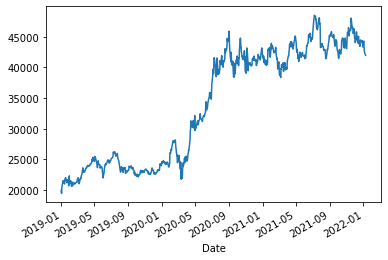

In [37]:
df["total position"].plot()

## DAILY RETURNS
- How much you made over time

In [38]:
df["daily returns"] = df["total position"].pct_change()

In [39]:
df

,AAPL,AMZN,AAPL normalized,AMZN normalized,AAPL allocation,AMZN allocation,AAPL position,AMZN position,total position,daily returns
Date,,,,,,,,,,
2019-01-02,38.326286,1539.130005,1.000000,1.000000,0.800000,0.200000,80000.000000,20000.000000,20000.000000,NaN
2019-01-03,34.508709,1500.280029,0.900393,0.974758,0.720314,0.194952,72031.417121,19495.169668,19495.169668,-0.025242
2019-01-04,35.981865,1575.390015,0.938830,1.023559,0.751064,0.204712,75106.394880,20471.175400,20471.175400,0.050064
2019-01-07,35.901772,1629.510010,0.936740,1.058721,0.749392,0.211744,74939.212737,21174.429770,21174.429770,0.034353
2019-01-08,36.586182,1656.579956,0.954598,1.076309,0.763678,0.215262,76367.809475,21526.186232,21526.186232,0.016612
...,...,...,...,...,...,...,...,...,...,...
2022-01-04,179.699997,3350.439941,4.688688,2.176840,3.750950,0.435368,375095.036272,43536.802359,43536.802359,-0.016916
2022-01-05,174.919998,3287.139893,4.563969,2.135713,3.651176,0.427143,365117.552433,42714.259122,42714.259122,-0.018893
2022-01-06,172.000000,3265.080078,4.487782,2.121380,3.590225,0.424276,359022.522730,42427.606086,42427.606086,-0.006711


In [40]:
averageDailyReturn = df["daily returns"].mean()

In [41]:
std = df["daily returns"].std()

In [42]:
cumulativeReturn = 100 * (df["total position"][-1] / df["total position"][0] - 1)

In [43]:
cumulativeReturn

109.84062167958525

### Sharp

In [44]:
sharp = averageDailyReturn/std

In [47]:
sharpForPeriod = sharp * (254 ** 0.5)

In [48]:
sharpForPeriod

0.986101292867972

In [49]:
df["total position"][-1]

41968.124335917055

In [50]:
df

,AAPL,AMZN,AAPL normalized,AMZN normalized,AAPL allocation,AMZN allocation,AAPL position,AMZN position,total position,daily returns
Date,,,,,,,,,,
2019-01-02,38.326286,1539.130005,1.000000,1.000000,0.800000,0.200000,80000.000000,20000.000000,20000.000000,NaN
2019-01-03,34.508709,1500.280029,0.900393,0.974758,0.720314,0.194952,72031.417121,19495.169668,19495.169668,-0.025242
2019-01-04,35.981865,1575.390015,0.938830,1.023559,0.751064,0.204712,75106.394880,20471.175400,20471.175400,0.050064
2019-01-07,35.901772,1629.510010,0.936740,1.058721,0.749392,0.211744,74939.212737,21174.429770,21174.429770,0.034353
2019-01-08,36.586182,1656.579956,0.954598,1.076309,0.763678,0.215262,76367.809475,21526.186232,21526.186232,0.016612
...,...,...,...,...,...,...,...,...,...,...
2022-01-04,179.699997,3350.439941,4.688688,2.176840,3.750950,0.435368,375095.036272,43536.802359,43536.802359,-0.016916
2022-01-05,174.919998,3287.139893,4.563969,2.135713,3.651176,0.427143,365117.552433,42714.259122,42714.259122,-0.018893
2022-01-06,172.000000,3265.080078,4.487782,2.121380,3.590225,0.424276,359022.522730,42427.606086,42427.606086,-0.006711
